In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#path2 = 'data/ruots/gotaland.csv'
path2 = 'data/ruots/norra_norrland.csv'
#path2 = 'data/ruots/sodra_norrland.csv'
# path2 = 'data/ruots/svealand.csv'

dfv = pd.read_csv(path2, header=None, sep=';')

In [3]:
#DT1, DT2 = '2014-05-06 00:00:00', '2014-05-07 00:00:00'

dfv['datetime'] = pd.to_datetime(dfv[0])
dfv['i95'] = dfv[1].str.replace(',', '.').astype(float)
dfv.drop([0, 1], axis=1, inplace=True)
#dfv = dfv.loc[(dfv['datetime'] >= DT1) & (dfv['datetime'] <= DT2)]

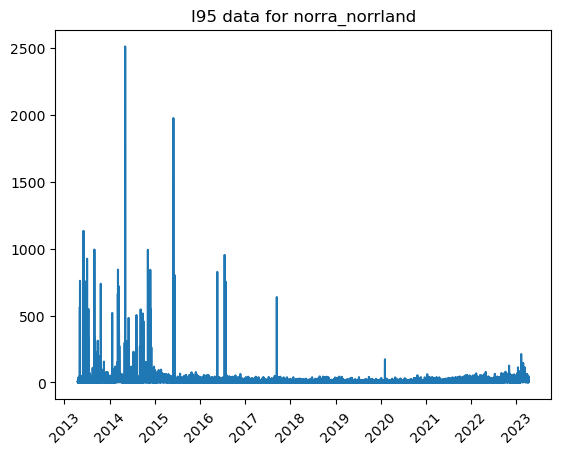

In [21]:
plt.plot(dfv['datetime'], dfv['i95'])
plt.xticks(rotation = 45)
plt.title(f'I95 data for {path2[11:-4]}')
plt.show()

In [19]:
fdf = dfv[(dfv['datetime'].dt.hour >= 9) & (dfv['datetime'].dt.hour <= 13)]
data = fdf.groupby(fdf['datetime'].dt.date)['i95'].median()
mdf = data.reset_index()
mdf.columns = ['datetime', 'median']

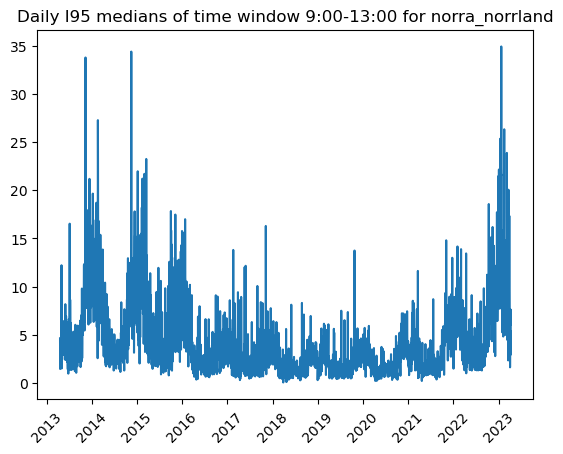

In [24]:
plt.close()
plt.plot(mdf['datetime'], mdf['median'])
plt.xticks(rotation = 45)
plt.title(f'Daily I95 medians of time window 9:00-13:00 for {path2[11:-4]}')
plt.show()